In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In C:\Users\tomst\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\tomst\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\tomst\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\tomst\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\tomst\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


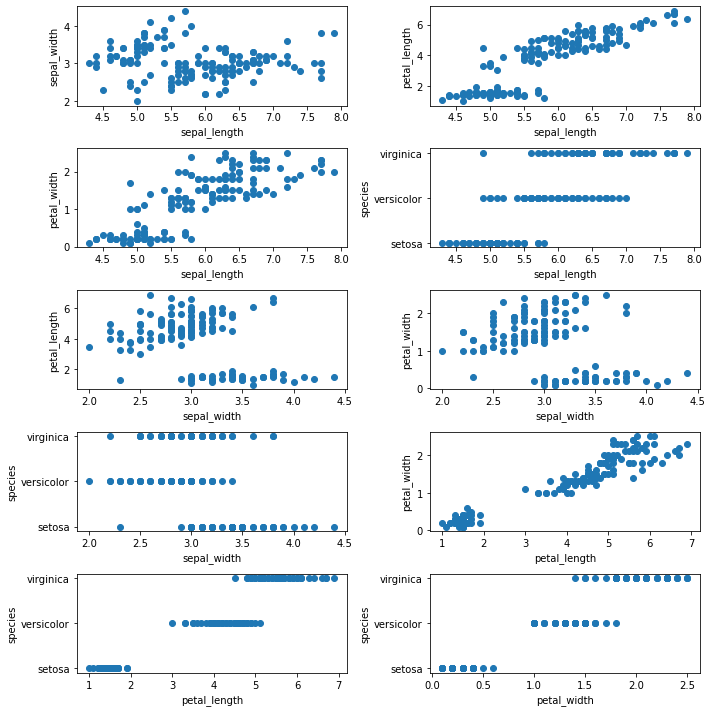

In [16]:
import itertools
dfcols = list(itertools.combinations(df.columns,2))


fig = plt.figure(figsize=(10,10))

columns = 2
rows = 5

for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.scatter(df[dfcols[i-1][0]], df[dfcols[i-1][1]])
    plt.xlabel(dfcols[i-1][0])
    plt.ylabel(dfcols[i-1][1])
    
    

plt.tight_layout()
plt.show()

In [8]:
dbscan=DBSCAN()
dbscan.fit(df[['sepal_length', 'sepal_width']])

DBSCAN()

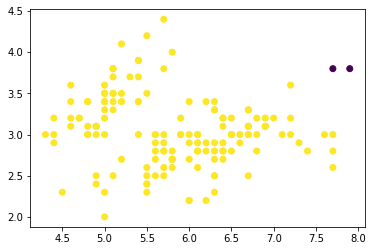

In [9]:
colors = dbscan.labels_
plt.scatter(df['sepal_length'], df['sepal_width'], c = colors)

In [10]:
from sklearn.neighbors import NearestNeighbors
neighbor = NearestNeighbors(n_neighbors=2)
nbrs = neighbor.fit(df[['sepal_length', 'sepal_width']])
distances, indices = nbrs.kneighbors(df[['sepal_length', 'sepal_width']])

In [11]:
distances

array([[0.        , 0.        ],
       [0.        , 0.1       ],
       [0.        , 0.        ],
       [0.        , 0.1       ],
       [0.        , 0.1       ],
       [0.        , 0.        ],
       [0.        , 0.2       ],
       [0.        , 0.        ],
       [0.        , 0.1       ],
       [0.        , 0.        ],
       [0.        , 0.1       ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.1       ],
       [0.        , 0.2236068 ],
       [0.        , 0.28284271],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.2236068 ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.1       ],
       [0.        , 0.2       ],
       [0.        , 0.1       ],
       [0.        , 0.        ],
       [0.        , 0.1       ],
       [0.        , 0.        ],
       [0.        , 0.1       ],
       [0.        , 0.1       ],
       [0.        , 0.        ],
       [0.

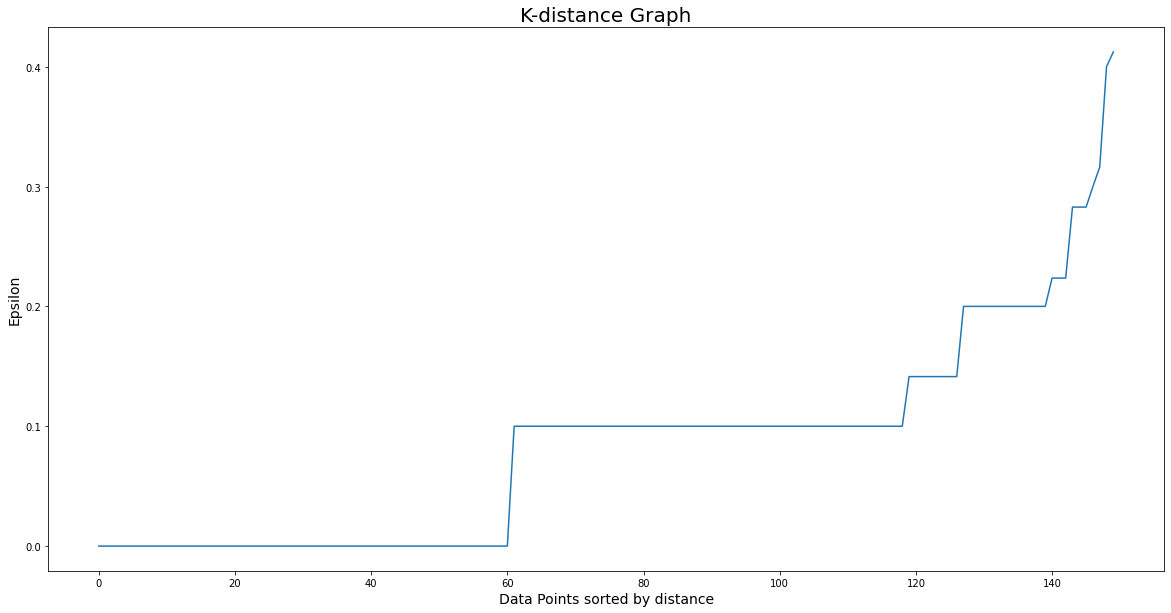

In [13]:
import numpy as np
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph', fontsize=20)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

In [15]:
eps = (0.3, 0.35, 0.4)
minpts = (5, 10, 15)

hyperparams = list(itertools.product(eps, minpts))

hyperparams

[(0.3, 5),
 (0.3, 10),
 (0.3, 15),
 (0.35, 5),
 (0.35, 10),
 (0.35, 15),
 (0.4, 5),
 (0.4, 10),
 (0.4, 15)]

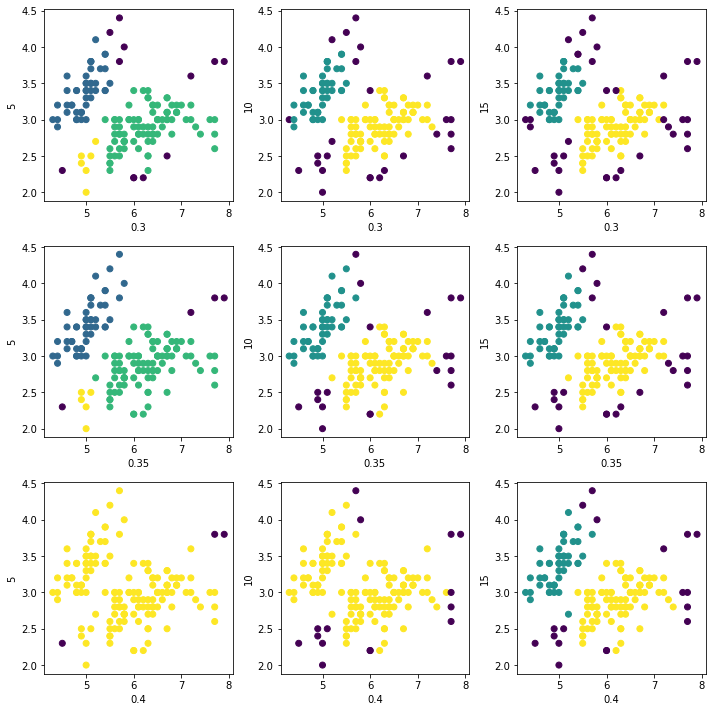

In [21]:
data = df[["sepal_length", "sepal_width"]]


fig = plt.figure(figsize=(10,10))

columns = 3
rows = 3

for i in range(1, columns*rows+1):
    model = DBSCAN(eps = hyperparams[i-1][0], min_samples = hyperparams[i-1][1]).fit(data)
    colors = model.labels_
    fig.add_subplot(rows, columns, i)
    plt.scatter(data["sepal_length"], data["sepal_width"], c=colors)
    plt.xlabel(hyperparams[i-1][0])
    plt.ylabel(hyperparams[i-1][1])
    
    

plt.tight_layout()
plt.show()

In [24]:
model = DBSCAN(eps = 0.4, min_samples = 10).fit(data)
colors = model.labels_

outliers = data[model.labels_ == -1]
print(outliers)

     sepal_length  sepal_width
14            5.8          4.0
15            5.7          4.4
41            4.5          2.3
57            4.9          2.4
60            5.0          2.0
62            6.0          2.2
93            5.0          2.3
98            5.1          2.5
106           4.9          2.5
117           7.7          3.8
118           7.7          2.6
119           6.0          2.2
122           7.7          2.8
131           7.9          3.8
135           7.7          3.0
